In [1]:
import time
import copy
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
from SGLD_model import SGLD_model
from Utils import data_loader, to_variable, log_gaussian_loss
from Utils import test_acc, plot_Uncertainty, plot_Uncertainty_Regression
from MCDrop_model import MCDrop_model
from Utils import plot_Uncertainty_drop, plot_Uncertainty_Regression_drop

# SGLD

## Classification

In [2]:

trainloader, valloader = data_loader(True)
net = SGLD_model(input_dim=1*28*28, output_dim=10, N_train=trainloader.dataset.data.shape[0], 
                       classification=True, learn_rate=1e-4, 
                       batch_size=trainloader.batch_size, weight_decay=5e-7)

In [ ]:
nets = net.train(num_nets=30, mix_epochs=2, burnin_epochs=32,
          gamma=-.65, b=.9, a=.01, trainloader=trainloader)

100%|██████████| 20/20 [00:00<00:00, 66.58it/s]


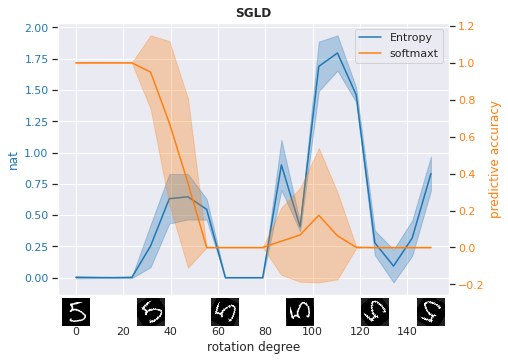

In [7]:
dataiter = iter(valloader)
images, labels = dataiter.next()
idx = 15
plot_Uncertainty(x=images[idx], target=labels[idx], nets=nets, err_type_="rotate")

## Regression

In [9]:
trainloader, valloader = data_loader(classification=False)
net = SGLD_model(input_dim=1, output_dim=1, N_train=trainloader.batch_size, 
                       classification=False, learn_rate=1e-4, 
                       batch_size=trainloader.batch_size, weight_decay=5e-8)

In [ ]:
nets = net.train(num_nets=50, mix_epochs=100, burnin_epochs=4000,
          gamma=-0.75, b=21, a=0.01, trainloader=trainloader)

/content/Utils.py:270: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds = network.forward(torch.tensor(x_test).float().cuda()).cpu().data.numpy()


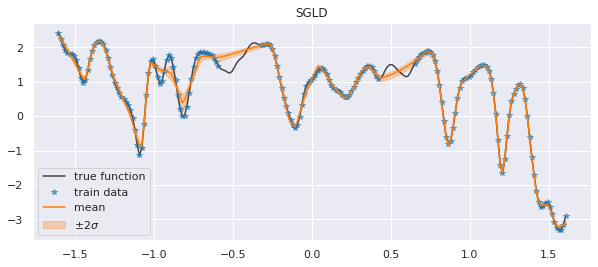

In [11]:

plot_Uncertainty_Regression(valloader, trainloader, nets)

# MCDrop

## classification

In [2]:
trainloader, valloader = data_loader(True)
net = MCDrop_model(input_dim=1*28*28, output_dim=10, N_train=trainloader.dataset.data.shape[0], 
                       classification=True, learn_rate=1e-4, prop=0.2,
                       batch_size=trainloader.batch_size, weight_decay=5e-7)

In [ ]:
net.train(num_epochs=32, trainloader=trainloader)

100%|██████████| 20/20 [00:01<00:00, 12.72it/s]


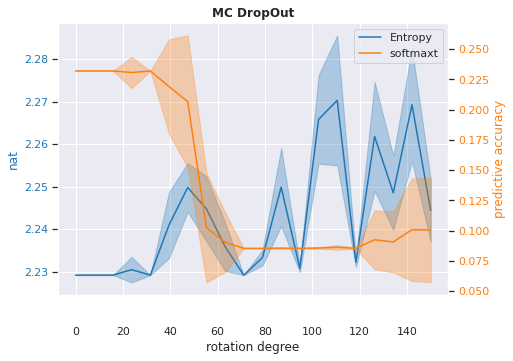

In [4]:
dataiter = iter(valloader)
images, labels = dataiter.next()
idx = 15
plot_Uncertainty_drop(x=images[idx], target=labels[idx], test_iter=100, net=net, err_type_="rotate")


## regression

In [15]:
trainloader, valloader = data_loader(classification=False)
net = MCDrop_model(input_dim=1, output_dim=1, N_train=trainloader.batch_size, 
                       classification=False, learn_rate=1e-4, prop=0.3,
                       batch_size=trainloader.batch_size, weight_decay=5e-7)

In [ ]:
net.train(num_epochs=12000, trainloader=trainloader)

/content/Utils.py:389: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds = net.network.forward(torch.tensor(x_test).float().cuda()).cpu().data.numpy()


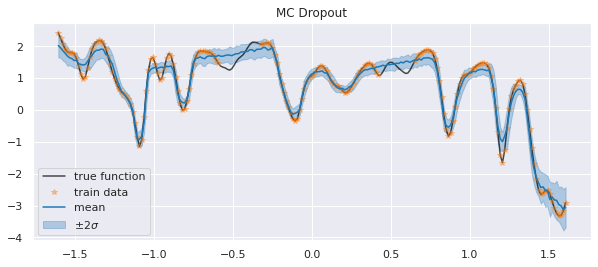

In [27]:
plot_Uncertainty_Regression_drop(valloader, trainloader, net)